In [28]:
# Import dependecies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import datetime as dt
import scipy.stats as sts

In [10]:
# Import CycleTime

file_path = "Resources\CycleTime.csv"

cycle_df = pd.read_csv(file_path)

cycle_df.shape

(149525, 14)

In [11]:
cycle_df.dropna(inplace=True)

cycle_df.shape

(135767, 14)

In [12]:
cycle_df.head()

,Date,Truck,Shovel,LoadLocation,DumpLocationAdjusted,MaterialType,AvgFullHaul,AvgTimeForDump,AvgEmptyHaul,AvgSpotQueue,AvgTimeLoading,Loads,CycleDist,AvgTimeCycle
0,1/1/2020,T315,L530,MIP-X__01,CRUSHER 1,O-ARG,14.000000,5.216667,4.772222,5.088889,5.138889,3,4.0,34.216666
1,1/1/2020,T315,L530,X-BENCH-1,CRUSHER 1,O-ARG,14.016667,3.472222,11.861111,0.138889,2.105555,3,4.2,31.594444
2,1/1/2020,T315,L530,X-BENCH-1,CRUSHER 1,O-ARG,9.325000,4.608333,4.433333,5.258333,10.233333,2,4.4,33.858332
3,1/1/2020,T315,L530,X-BENCH-1,CRUSHER 3,O-ARG,17.683333,2.733333,29.283333,0.000000,8.183333,1,5.1,57.883332
4,1/1/2020,T315,L530,X-BENCH-1,CRUSHER 3,O-ARG,19.261111,2.238889,7.466667,1.027778,3.761111,3,5.1,33.755555


In [14]:
loading_df = cycle_df[["Date","Truck","Shovel","LoadLocation","AvgTimeLoading","Loads"]]
loading_df.head()

,Date,Truck,Shovel,LoadLocation,AvgTimeLoading,Loads
0,1/1/2020,T315,L530,MIP-X__01,5.138889,3
1,1/1/2020,T315,L530,X-BENCH-1,2.105555,3
2,1/1/2020,T315,L530,X-BENCH-1,10.233333,2
3,1/1/2020,T315,L530,X-BENCH-1,8.183333,1
4,1/1/2020,T315,L530,X-BENCH-1,3.761111,3


In [15]:
loading_df.dtypes

Date               object
Truck              object
Shovel             object
LoadLocation       object
AvgTimeLoading    float64
Loads               int64
dtype: object

In [17]:
# Change Date column type

loading_df["Date"] = pd.to_datetime(loading_df["Date"])

C:\Users\Joshua.Shutey\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
# Create weight for aveage

loading_df["Load_time_wt"] = loading_df["AvgTimeLoading"] * loading_df["Loads"]

C:\Users\Joshua.Shutey\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
loading_times_ave = loading_df.groupby(['Date','Shovel']).sum()

loading_times_ave.reset_index(inplace=True)
loading_times_ave

,Date,Shovel,AvgTimeLoading,Loads,Load_time_wt
0,2020-01-01,L530,177.079158,62,333.083320
1,2020-01-01,L532,132.890273,42,283.499993
2,2020-01-01,S515,254.462488,74,410.333318
3,2020-01-01,S517,88.318052,53,209.049993
4,2020-01-02,L532,227.960982,100,494.666651
...,...,...,...,...,...
4598,2022-05-02,L532,109.077577,60,347.116660
4599,2022-05-02,S515,24.991664,15,49.683329
4600,2022-05-02,S516,84.827774,21,127.783328
4601,2022-05-02,S517,17.679997,14,31.483329


In [36]:
loading_times_ave['AvgTimeLoading'] = loading_times_ave["Load_time_wt"]/loading_times_ave["Loads"]
loading_times_ave['year']= loading_times_ave['Date'].dt.year
loading_times_ave['month']= loading_times_ave['Date'].dt.to_period("M")
loading_times_ave

,Date,Shovel,AvgTimeLoading,Loads,Load_time_wt,year,month
0,2020-01-01,L530,5.372312,62,333.083320,2020,2020-01
1,2020-01-01,L532,6.750000,42,283.499993,2020,2020-01
2,2020-01-01,S515,5.545045,74,410.333318,2020,2020-01
3,2020-01-01,S517,3.944339,53,209.049993,2020,2020-01
4,2020-01-02,L532,4.946667,100,494.666651,2020,2020-01
...,...,...,...,...,...,...,...
4598,2022-05-02,L532,5.785278,60,347.116660,2022,2022-05
4599,2022-05-02,S515,3.312222,15,49.683329,2022,2022-05
4600,2022-05-02,S516,6.084920,21,127.783328,2022,2022-05
4601,2022-05-02,S517,2.248809,14,31.483329,2022,2022-05


In [35]:
# Get list of Unique Shovel and Loader Numbers

loader_list = loading_times_ave["Shovel"].unique()

#  Get descriptive Statistics for Shovel and Loader 
for x in loader_list:
    stats = loading_times_ave['AvgTimeLoading'][loading_times_ave['Shovel']==x].describe()
    print(f'{x} has load time stats {stats}')

L530 has load time stats count    702.000000
mean       4.643142
std        1.177803
min        0.033333
25%        3.868822
50%        4.510250
75%        5.168018
max       13.308333
Name: AvgTimeLoading, dtype: float64
L532 has load time stats count    671.000000
mean       4.719552
std        1.102245
min        0.800000
25%        4.058987
50%        4.536309
75%        5.144012
max       14.361111
Name: AvgTimeLoading, dtype: float64
S515 has load time stats count    713.000000
mean       4.544931
std        1.044625
min        1.923863
25%        3.868518
50%        4.416355
75%        5.052459
max       11.513333
Name: AvgTimeLoading, dtype: float64
S517 has load time stats count    762.000000
mean       2.950622
std        0.690803
min        0.016666
25%        2.520670
50%        2.860418
75%        3.251391
max       10.816666
Name: AvgTimeLoading, dtype: float64
S516 has load time stats count    725.000000
mean       4.111873
std        0.929038
min        1.804317
25%    

In [44]:
   
loading_times_ave_month = loading_times_ave.groupby(['month','Shovel']).sum()
loading_times_ave_month['AvgTimeLoading'] = loading_times_ave_month["Load_time_wt"]/loading_times_ave_month["Loads"]
loading_times_ave_month.reset_index(inplace=True)
loading_times_ave_month['month']=loading_times_ave_month['month'].astype(str)
loading_times_ave_month['month']=pd.to_datetime(loading_times_ave_month['month'])

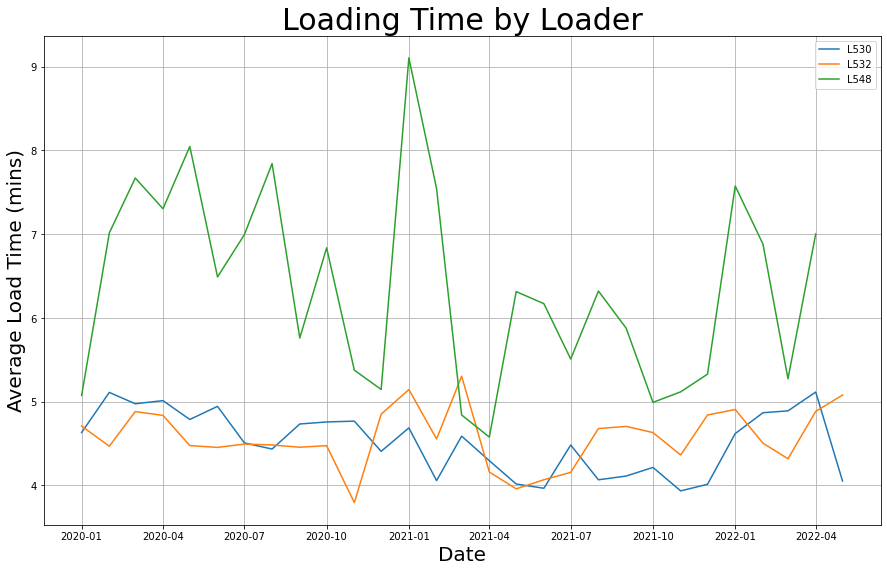

In [50]:
# Build line plot for Load_time for Loaders


plt.subplots(figsize=(15, 9))
plt.plot(loading_times_ave_month['month'][loading_times_ave_month['Shovel']=="L530"], loading_times_ave_month['AvgTimeLoading'][loading_times_ave_month['Shovel']=="L530"])
plt.plot(loading_times_ave_month['month'][loading_times_ave_month['Shovel']=="L532"], loading_times_ave_month['AvgTimeLoading'][loading_times_ave_month['Shovel']=="L532"])
plt.plot(loading_times_ave_month['month'][loading_times_ave_month['Shovel']=="L548"], loading_times_ave_month['AvgTimeLoading'][loading_times_ave_month['Shovel']=="L548"])
plt.title("Loading Time by Loader", fontsize=30)
plt.ylabel("Average Load Time (mins)", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.legend(['L530','L532',"L548"])
# plt.ylim([1,6])
plt.grid(True)

# Save the figure.
plt.savefig("images/Ave_Load_Time_Loaders.png")

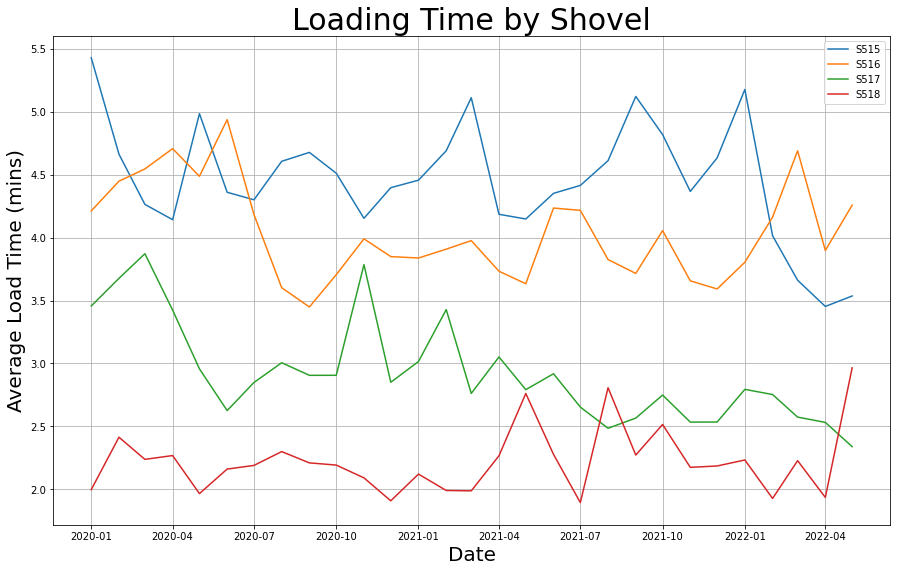

In [51]:
# Build line plot for Load_time for Shovels


plt.subplots(figsize=(15, 9))
plt.plot(loading_times_ave_month['month'][loading_times_ave_month['Shovel']=="S515"], loading_times_ave_month['AvgTimeLoading'][loading_times_ave_month['Shovel']=="S515"])
plt.plot(loading_times_ave_month['month'][loading_times_ave_month['Shovel']=="S516"], loading_times_ave_month['AvgTimeLoading'][loading_times_ave_month['Shovel']=="S516"])
plt.plot(loading_times_ave_month['month'][loading_times_ave_month['Shovel']=="S517"], loading_times_ave_month['AvgTimeLoading'][loading_times_ave_month['Shovel']=="S517"])
plt.plot(loading_times_ave_month['month'][loading_times_ave_month['Shovel']=="S518"], loading_times_ave_month['AvgTimeLoading'][loading_times_ave_month['Shovel']=="S518"])
plt.title("Loading Time by Shovel", fontsize=30)
plt.ylabel("Average Load Time (mins)", fontsize=20)
plt.xlabel("Date", fontsize=20)
plt.legend(['S515','S516',"S517",'S518'])
# plt.ylim([1,6])
plt.grid(True)

# Save the figure.
plt.savefig("images/Ave_Load_Time_Shovels.png")

In [56]:
loading_times_ave_year = loading_times_ave.groupby(['year','Shovel']).sum()
loading_times_ave_year['AvgTimeLoading'] = loading_times_ave_year["Load_time_wt"]/loading_times_ave_year["Loads"]

loading_times_ave_year.drop(columns="Load_time_wt", inplace=True)
loading_times_ave_year

AvgTimeLoading  Loads
year Shovel                       
2020 L530          4.713426  19052
     L532          4.586998  20309
     L548          6.822660   3251
     S515          4.485677  19539
     S516          4.125922  20368
     S517          3.132177  25381
     S518          2.158588  34738
2021 L530          4.162662  21894
     L532          4.443043  18303
     L548          5.766689   4513
     S515          4.516453  16733
     S516          3.846940  22863
     S517          2.734642  28296
     S518          2.260723  40340
2022 L530          4.824081   6015
     L532          4.658893   8889
     L548          6.822515   1100
     S515          3.781542   6447
     S516          4.140645   6426
     S517          2.652661  12313
     S518          2.099635  10917